In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
#import folium
#import folium.plugins as plugins

import os

from datetime import datetime as dt
from dateutil import parser

#!pip install pandas_profiling
#import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [4]:
pipe = pd.read_csv('pipeline-accidents.csv')
pipe.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [5]:
#pp.ProfileReport(pipe)

In [13]:
pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

In [14]:
y = pd.DataFrame(pipe.groupby(by = ['Operator Name', 'Cause Category'])['Report Number'].count())
y1 = y.sort_values(by='Report Number', ascending = False).head(10).reset_index()
y1

,Operator Name,Cause Category,Report Number
0,ENTERPRISE PRODUCTS OPERATING LLC,MATERIAL/WELD/EQUIP FAILURE,102
1,COLONIAL PIPELINE CO,MATERIAL/WELD/EQUIP FAILURE,90
2,ENTERPRISE CRUDE PIPELINE LLC,MATERIAL/WELD/EQUIP FAILURE,88
3,SUNOCO PIPELINE L.P.,CORROSION,79
4,"MAGELLAN PIPELINE COMPANY, LP",MATERIAL/WELD/EQUIP FAILURE,75
5,SUNOCO PIPELINE L.P.,MATERIAL/WELD/EQUIP FAILURE,64
6,"PLAINS PIPELINE, L.P.",MATERIAL/WELD/EQUIP FAILURE,62
7,"PLAINS PIPELINE, L.P.",CORROSION,59
8,"BUCKEYE PARTNERS, LP",MATERIAL/WELD/EQUIP FAILURE,59
9,ENTERPRISE CRUDE PIPELINE LLC,CORROSION,56


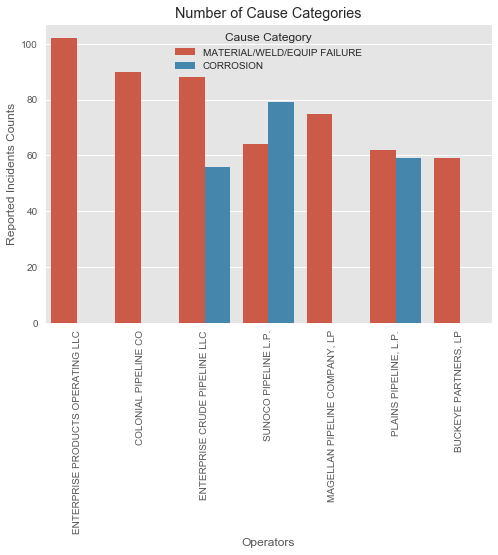

In [19]:
sns.barplot(x = "Operator Name", y = "Report Number", hue = "Cause Category",
                 data = y1)
plt.title('Number of Cause Categories')
plt.xlabel('Operators')
plt.ylabel('Reported Incidents Counts')
plt.xticks(rotation = 90)
plt.show()

In [20]:
z = pd.DataFrame(pipe.groupby(by = ['Operator Name', 'Cause Subcategory'])['Report Number'].count())
z1 = z.sort_values(by='Report Number', ascending = False).head(10).reset_index()
z1

,Operator Name,Cause Subcategory,Report Number
0,SUNOCO PIPELINE L.P.,INTERNAL,58
1,"PLAINS PIPELINE, L.P.",INTERNAL,48
2,ENTERPRISE CRUDE PIPELINE LLC,INTERNAL,46
3,ENTERPRISE CRUDE PIPELINE LLC,OTHER EQUIPMENT FAILURE,24
4,COLONIAL PIPELINE CO,NON-THREADED CONNECTION FAILURE,22
5,SUNOCO PIPELINE L.P.,EXTERNAL,21
6,ENTERPRISE PRODUCTS OPERATING LLC,NON-THREADED CONNECTION FAILURE,20
7,WYOMING PIPELINE COMPANY,EXTERNAL,18
8,SUNOCO PIPELINE L.P.,NON-THREADED CONNECTION FAILURE,17
9,ENTERPRISE PRODUCTS OPERATING LLC,PUMP OR PUMP-RELATED EQUIPMENT,17


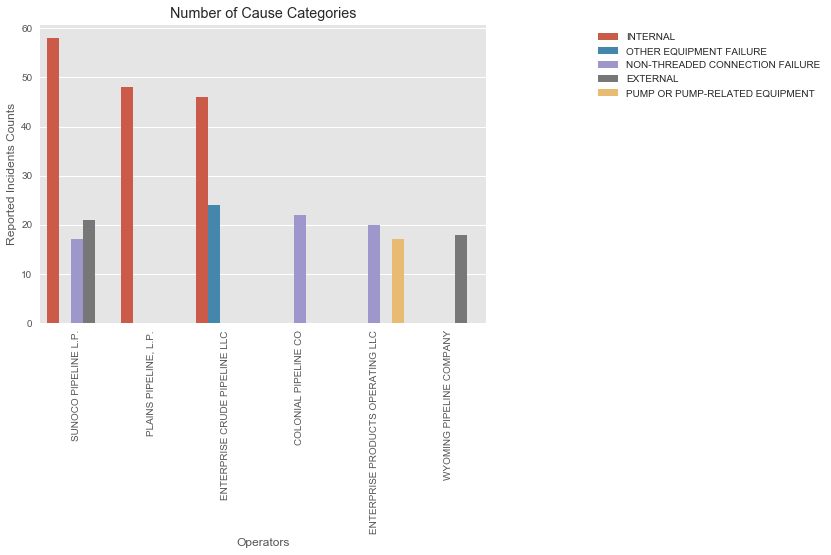

In [22]:
sns.barplot(x = "Operator Name", y = "Report Number", hue = "Cause Subcategory",
                 data = z1)
plt.title('Number of Cause Categories')
plt.xlabel('Operators')
plt.ylabel('Reported Incidents Counts')
plt.xticks(rotation = 90)
plt.legend(loc = 9, bbox_to_anchor = (1.5, 1))
plt.show()

In [23]:
pd.DataFrame(pipe[['Operator Name', 'Accident Year']][pipe['Liquid Explosion'] == 'YES'])['Operator Name'].value_counts()   #.duplicated()

ENTERPRISE PRODUCTS OPERATING LLC    5
MARATHON PIPE LINE LLC               2
CHEVRON PIPE LINE CO                 2
WILLIAMS FIELD SERVICES              1
BLUE RACER MIDSTREAM, LLC            1
DIXIE PIPELINE COMPANY LLC           1
NORTH DAKOTA PIPELINE COMPANY LLC    1
PLAINS PIPELINE, L.P.                1
DIXIE PIPELINE                       1
Name: Operator Name, dtype: int64

In [24]:
pd.DataFrame(pipe[['Operator Name', 'Accident Year']][pipe['Liquid Explosion'] == 'YES'])

,Operator Name,Accident Year
176,DIXIE PIPELINE,2010
392,ENTERPRISE PRODUCTS OPERATING LLC,2011
590,CHEVRON PIPE LINE CO,2011
674,"PLAINS PIPELINE, L.P.",2011
898,CHEVRON PIPE LINE CO,2012
953,ENTERPRISE PRODUCTS OPERATING LLC,2012
1178,MARATHON PIPE LINE LLC,2013
1340,ENTERPRISE PRODUCTS OPERATING LLC,2013
1751,NORTH DAKOTA PIPELINE COMPANY LLC,2014
1849,"BLUE RACER MIDSTREAM, LLC",2014


In [25]:
liquida = pd.DataFrame(pipe.groupby(by = ['Liquid Type', 'Operator Name'])['Report Number'].count())
liquida1 = liquida.sort_values(by = 'Report Number', ascending = False).head(10).reset_index()
liquida1

,Liquid Type,Operator Name,Report Number
0,CRUDE OIL,ENTERPRISE CRUDE PIPELINE LLC,194
1,CRUDE OIL,"PLAINS PIPELINE, L.P.",154
2,CRUDE OIL,SUNOCO PIPELINE L.P.,151
3,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",COLONIAL PIPELINE CO,136
4,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","MAGELLAN PIPELINE COMPANY, LP",119
5,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","BUCKEYE PARTNERS, LP",110
6,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ENTERPRISE PRODUCTS OPERATING LLC,100
7,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","KINDER MORGAN LIQUID TERMINALS, LLC",86
8,CRUDE OIL,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",69
9,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",ENTERPRISE PRODUCTS OPERATING LLC,50


In [26]:
pipe['Operator Name'][pipe['All Fatalities'] == 2]

758     ENBRIDGE ENERGY, LIMITED PARTNERSHIP
2730                    COLONIAL PIPELINE CO
Name: Operator Name, dtype: object

In [27]:
pipe[['Operator Name', 'Accident Year']][pipe['All Fatalities'] == 1]

,Operator Name,Accident Year
176,DIXIE PIPELINE,2010
392,ENTERPRISE PRODUCTS OPERATING LLC,2011
856,"OILTANKING, HOUSTON LP",2012
1163,CHEVRON MIDSTREAM PIPELINES LLC,2013
2145,VALERO REFINING-TEXAS L.P.,2015
2717,"MAGELLAN AMMONIA PIPELINE, L.P.",2016


In [4]:
pd.read_csv('https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=B5FZO72NL9QS8TWC&datatype=csv')

# GBP_USD
cpGBP_USD = pd.read_csv('https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=GBP&to_symbol=USD&apikey=B5FZO72NL9QS8TWC&datatype=csv', index_col = False)
cpGBP_USD.set_index('timestamp', inplace=True)
cpGBP_USD.to_csv('cpGBP_USD.csv')